In [1]:
! ls . | cut -d '.' -f2 | uniq -c

   1 dcm
   1 OneDrive_1_11-11-2022
   1 bin
   1 ipynb
   1 etc
   1 lib
   1 cfg
   1 share
   1 ipynb
   1 ybr2g


In [2]:
import os
import sys

sys.path.append('lib/python3.8/site-packages')
import pydicom
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [3]:
print([x for x in os.listdir() if x.endswith('.dcm')])

['Image-43.dcm']


In [4]:
dataset = pydicom.dcmread('Image-43.dcm')
print(dataset.elements)

<bound method Dataset.elements of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Multi-frame Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 9999.15190412837470432827986817489473738762
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'INTRACARDIAC']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 9999.1519041283747043282798681748947

In [5]:
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

(73, 600, 800, 3)


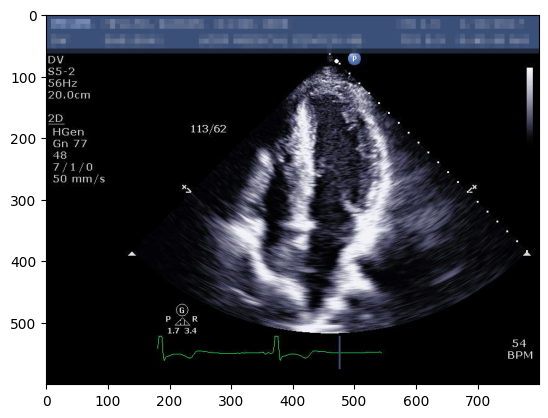

In [92]:
frames = dataset.pixel_array.copy()
print(frames.shape)

# for i in range(len(frames) - 1):
import random
i = random.randint(0, len(frames) - 1)
plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_YUV2RGB))


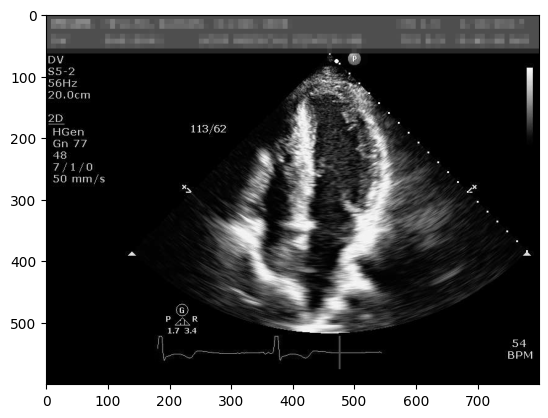

In [108]:
#YcBcR
f1 = frames[i]
f2 = frames[i+1]

if dataset[(0x0028, 0x0004)].value in ['YBR_FULL', 'YBR_FULL_422']:
    f1 = cv2.cvtColor(f1, cv2.COLOR_YUV2RGB)
    f2 = cv2.cvtColor(f2, cv2.COLOR_YUV2RGB)

f1 = np.dot(f1[...,:3], [0.299, 0.587, 0.114])
plt.imshow(f1)
f2 = np.dot(f2[...,:3], [0.299, 0.587, 0.114])

diff = np.abs(f1 - f2)
# plt.imshow(diff)

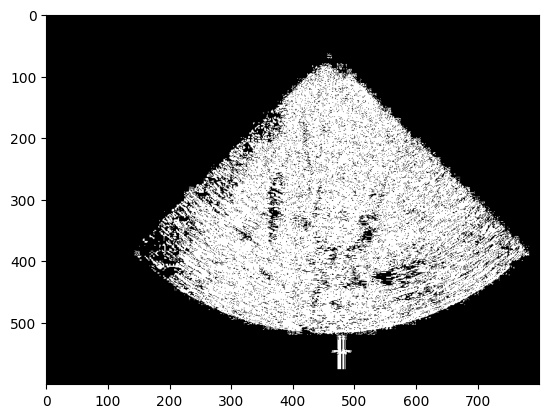

In [109]:
thresh = np.where(diff > 2.5 , 1, 0)
plt.imshow(thresh)

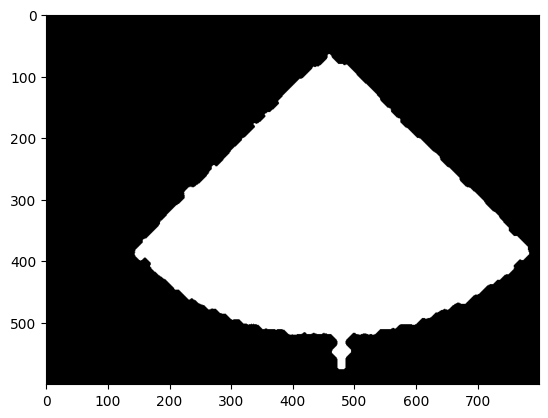

In [118]:
from scipy.ndimage import median_filter, binary_fill_holes, binary_closing

thresh2 = binary_fill_holes(thresh)
thresh2 = binary_closing(thresh2, iterations=10)
thresh2 = median_filter(thresh2, size=(5, 5))
plt.imshow(thresh2)


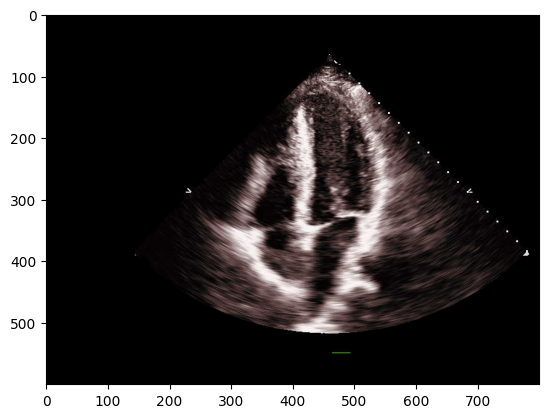

In [119]:
mask = np.stack([thresh2]*3, axis=2)
plt.imshow(mask*cv2.cvtColor(frames[0], cv2.COLOR_YUV2BGR))